<a href="https://colab.research.google.com/github/Iswarya-B/Women-breast-cancer-prediction/blob/main/Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting breast cancer in patients**

# Problem Statement:
Given the details of cell nuclei taken from breast mass, predict whether or not a patient
has breast cancer using the Ensembling Techniques. Perform necessary exploratory
data analysis before building the model and evaluate the model based on performance
metrics other than model accuracy.

#Dataset Information:
The dataset consists of several predictor variables and one target variable, Diagnosis.
The target variable has values 'Benign' and 'Malignant', where 'Benign' means that the
cells are not harmful or there is no cancer and 'Malignant' means that the patient has
cancer and the cells have a harmful effect

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [74]:
pd.set_option('display.max_columns', None)

In [75]:
wbc = pd.read_csv("/content/cancer.csv")
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
wbc.shape

(569, 33)

In [77]:
wbc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [78]:
wbc.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [79]:
wbc = wbc.drop(columns = ['id', 'Unnamed: 32'], axis=1) # Id is not a feature, Unnmaed: 32 is full of NaN values --> dropping both the features

In [80]:
wbc.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [81]:
# Checking whether it is balenced or imbalenced dataset
wbc['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

62% belongs to Benign and 38% belongs to Malignant--> Balenced dataset

In [16]:
wbc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


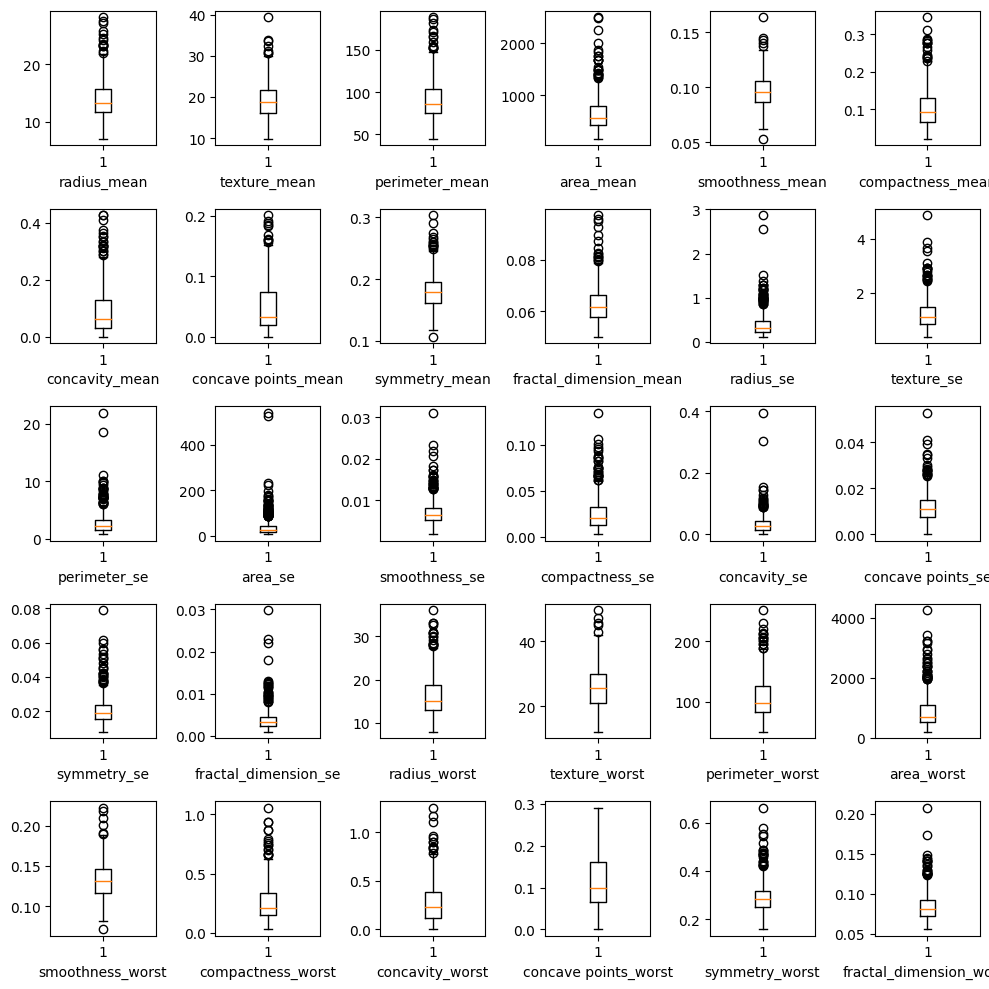

In [58]:
# Outlier detection
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(10, 10))
axes = axes.flatten()
for i, column in enumerate(wbc.columns[1:], start=1):
    ax = axes[i-1]  # Subtract 1 to adjust for the ignored 0th column
    ax.boxplot(wbc[column])
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

Despite the presence of numerous outliers in each feature, the chosen approach is to retain them because it is a medical dataset

Encoding

In [19]:
#Label Encoding
# Malignant --> Cancer Benign --> No Cancer
wbc.diagnosis = wbc.diagnosis.map({'M':1, 'B':0})

Features and Target

In [21]:
# X --> Features, y --> Target
X = np.array(wbc.loc[:,wbc.columns[1:]])
y = np.array(wbc['diagnosis'])

Splitting

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [23]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [24]:
y_train.shape, y_test.shape

((426,), (143,))

Scaling

In [61]:
std = RobustScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# **Random Forest**

In [62]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt') # Initialize
rf.fit(X_train, y_train)                                                           # Fit
predictions = rf.predict(X_test)                                                   # Predict

In [63]:
# Evaluation metrics
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auroc = roc_auc_score( y_test, predictions)
print("Random forest model accuracy score: {:.2f}".format(acc))
print("Random forest model F1-score: {:.2f}".format(f1))
print("Random forest model AUROC score: {:.2f}".format(auroc))

Random forest model accuracy score: 0.97
Random forest model F1-score: 0.96
Random forest model AUROC score: 0.97


In [64]:
# Interpret model results
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

In [65]:
feature_col = list(wbc.loc[:,wbc.columns[1:]])

In [66]:
# Viewing one tree from 100
tree = rf.estimators_[4]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_col, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [67]:
# Feature importances
importances = rf.feature_importances_

In [68]:
imp_feature = [(feature, round(importance, 2)) for feature, importance in zip(feature_col, importances)]
imp_feature = sorted(imp_feature, key = lambda x:x[1], reverse = True)
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in imp_feature];

Feature: concave points_worst           Importance: 0.14
Feature: perimeter_worst                Importance: 0.12
Feature: radius_worst                   Importance: 0.1
Feature: area_worst                     Importance: 0.1
Feature: perimeter_mean                 Importance: 0.09
Feature: concave points_mean            Importance: 0.08
Feature: radius_mean                    Importance: 0.05
Feature: concavity_mean                 Importance: 0.05
Feature: area_mean                      Importance: 0.04
Feature: area_se                        Importance: 0.04
Feature: concavity_worst                Importance: 0.03
Feature: radius_se                      Importance: 0.02
Feature: texture_worst                  Importance: 0.02
Feature: compactness_worst              Importance: 0.02
Feature: texture_mean                   Importance: 0.01
Feature: smoothness_mean                Importance: 0.01
Feature: compactness_mean               Importance: 0.01
Feature: symmetry_mean           

In [69]:
# Giving test value and making predictions
rf.predict(np.array([[14.2,23.4,120.03,1200.04,0.156,0.132,0.172,0.097,0.24,0.872,1.543,2.360,19.874,250.19,0.012,0.098,0.176,0.0345,0.0543,0.0198,15.26,37.234,150.01,1245.75,0.147,0.234,0.49,0.15,0.365,0.207]]))

array([1])

## **XG Boost**

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [71]:
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  print("Learning rate : ", lr, " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9483942414174973
Learning rate :  0.02  Cross-Val score :  0.9461240310077519
Learning rate :  0.03  Cross-Val score :  0.9460686600221484
Learning rate :  0.04  Cross-Val score :  0.9531007751937984
Learning rate :  0.05  Cross-Val score :  0.9531007751937984
Learning rate :  0.06  Cross-Val score :  0.9531007751937984
Learning rate :  0.07  Cross-Val score :  0.9578073089700997
Learning rate :  0.08  Cross-Val score :  0.9601328903654485
Learning rate :  0.09  Cross-Val score :  0.9648394241417497
Learning rate :  0.1  Cross-Val score :  0.9625138427464008
Learning rate :  0.11  Cross-Val score :  0.9648394241417497
Learning rate :  0.12  Cross-Val score :  0.9625138427464008
Learning rate :  0.13  Cross-Val score :  0.9671650055370986
Learning rate :  0.14  Cross-Val score :  0.969545957918051
Learning rate :  0.15  Cross-Val score :  0.9648394241417497
Learning rate :  0.2  Cross-Val score :  0.9647840531561462
Learning rate :  0.5  Cross

Cross-val score is higher for learning rate = 0.14

In [72]:
model = xgb.XGBClassifier(learning_rate=0.14, n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('XGBoost model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))
print('XGBoost model f1 score: {0:0.2f}'. format(f1_score(y_test, y_pred)))
print('XGBoost model auroc score: {0:0.2f}'. format(roc_auc_score(y_test, y_pred)))

XGBoost model accuracy score: 0.98
XGBoost model f1 score: 0.97
XGBoost model auroc score: 0.98


Result:
For this particular dataset, to predict whether the patient has cancer or not both Random forest and XG boost giving ROC AUC score of more than 95%.
XG boost performs better than Random forest with the ROC AUC score of 98%